In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import cv2 
import os

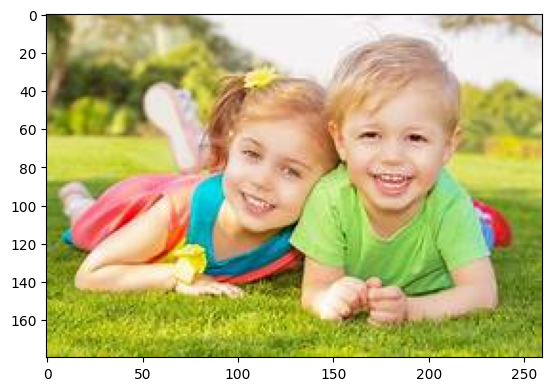

In [3]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"d:\Pictures\Saved Pictures\Camera Roll\image copy 2.png")
plt.imshow(img)



In [4]:
i1=cv2.imread(r"C:\Users\Admin\Pictures\Saved Pictures\Camera Roll\image copy 2.png")
i1

In [5]:
i1.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [6]:
train=ImageDataGenerator(rescale=1/200)
validation=ImageDataGenerator(rescale=1/200)

In [7]:
train_dataset=train.flow_from_directory(r'D:\Data Science & AI\Deep_Learning_Algorithms\Training',
                                        target_size=(200,200),
                                        batch_size=32,
                                        class_mode='binary')

validation_dataset=validation.flow_from_directory(r'D:\Data Science & AI\Deep_Learning_Algorithms\validation',
                                                  target_size=(200,200),
                                                  batch_size=32,
                                                  class_mode='binary')

                                                  

Found 4 images belonging to 2 classes.


Found 0 images belonging to 1 classes.


In [8]:
train_dataset.class_indices

{'Happy': 0, 'Sad': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0], dtype=int32)

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Flatten(),
                                  
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                  ]
)
                                 

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy']
              )

In [13]:
model_fit=model.fit(train_dataset,epochs=5)

Epoch 1/5


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.7773
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 2.5243e-25
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 2.5243e-25
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 2.5243e-25
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 - loss: 2.5243e-25


In [14]:
dir_path=r'D:\Data Science & AI\Deep_Learning_Algorithms\Testing'
for i in os.listdir(dir_path):
    print(i)

image copy 2.png
image copy 3.png
image copy.png
image.png


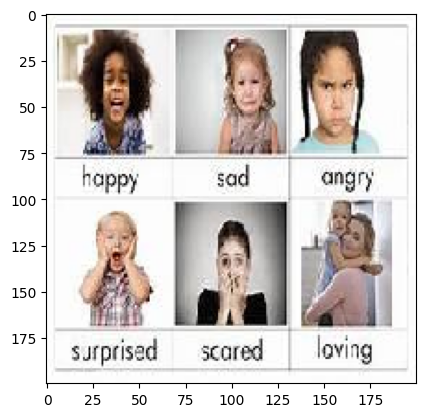

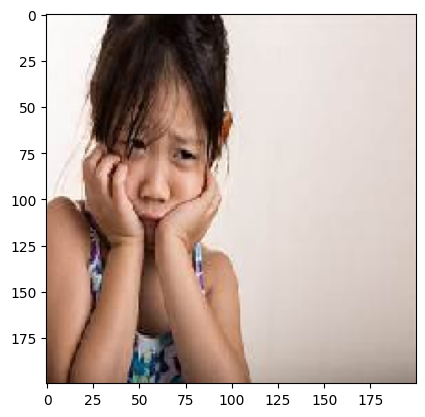

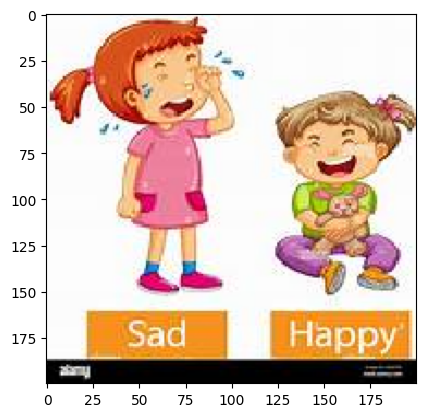

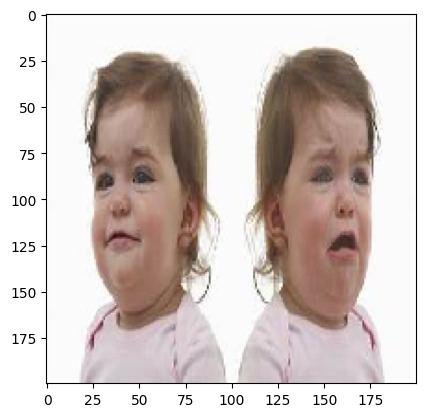

In [15]:
dir_path=r'D:\Data Science & AI\Deep_Learning_Algorithms\Testing'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    

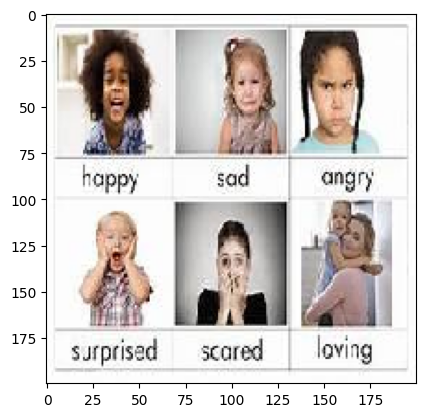

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
i am happy


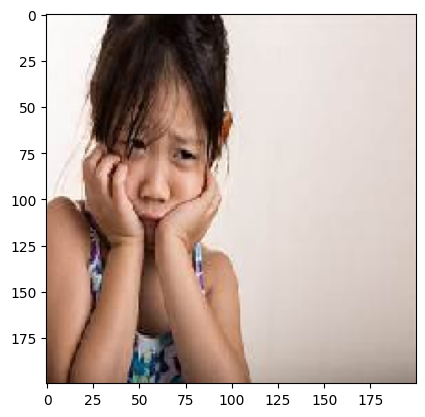

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
i am happy


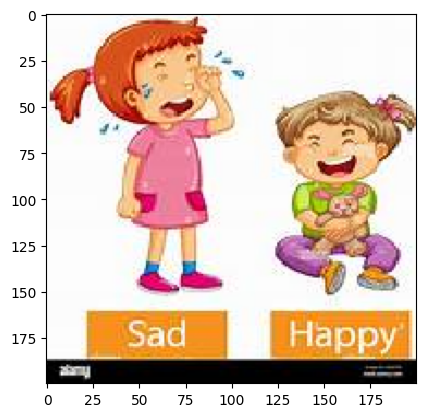

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am happy


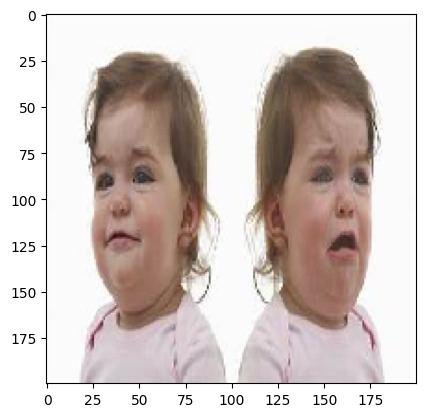

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
i am happy


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000019B2237C180>

In [37]:
dir_path=r'D:\Data Science & AI\Deep_Learning_Algorithms\Testing'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    
    val=model.predict(images)
    if val==0:
        print('i am happy')
    else:
        print('i am not happy')